In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Concrete_Data_Yeh.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [34]:
dataset.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [18]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
# Check for missing values and replace with mean value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy ='mean')
imputer.fit(X)
X = imputer.transform(X)

In [4]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =101)

In [7]:
X_train[:5,:]

array([[144.8,   0. , 133.6, 180.8,  11.1, 979.5, 811.5,  28. ],
       [425. , 106.3,   0. , 151.4,  18.6, 936. , 803.7,  56. ],
       [287.3, 120.5,  93.9, 187.6,   9.2, 904.4, 695.9,  28. ],
       [333. ,   0. ,   0. , 192. ,   0. , 931.2, 842.6,   7. ],
       [290.4,   0. ,  96.2, 168.1,   9.4, 961.2, 865. ,   3. ]])

In [9]:
y_train[:5]

array([13.2, 64.9, 43.8, 23.4, 22.5])

In [10]:
# Fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predicting the outcomes
y_pred = regressor.predict(X_test)

In [25]:
# Checking R2 score of the model
from sklearn.metrics import r2_score
r_sq = r2_score(y_test, y_pred)
r_sq = round(r_sq,2)
r_sq

0.61

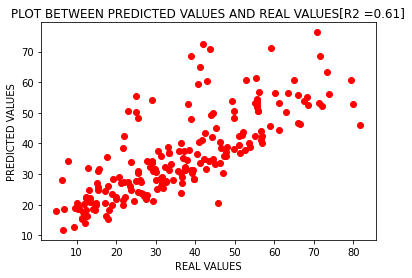

In [29]:
# Visualisation part
plt.title(f'PLOT BETWEEN PREDICTED VALUES AND REAL VALUES[R2 ={r_sq}]')
plt.scatter(y_test, y_pred , c='red')
plt.xlabel('REAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.show()

In [35]:
# Regression coefficients
print(regressor.coef_)
print(regressor.intercept_)

[ 0.1124933   0.09539303  0.08097259 -0.16339456  0.28143077  0.00918951
  0.01265157  0.12003711]
-3.5396038411043733


In [40]:
for i in range(len(regressor.coef_)):
  print(f'{dataset.columns[i]} : {regressor.coef_[i]}')

cement : 0.11249330457885091
slag : 0.09539302750839922
flyash : 0.0809725912343583
water : -0.16339456250224388
superplasticizer : 0.281430766630893
coarseaggregate : 0.009189507092264192
fineaggregate : 0.012651574933176118
age : 0.1200371088972308
